FIRST STEP IS DETECTION of una video using
@yolov8
@first dataset
@photos of una with own **dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd YOLOv8-DeepSORT-Object-Tracking

/content/drive/MyDrive/yolov8/YOLOv8-DeepSORT-Object-Tracking


In [ ]:
!pip install -e '.[dev]'

Obtaining file:///content/drive/MyDrive/yolov8/YOLOv8-DeepSORT-Object-Tracking
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.5/227.5 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 71.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 99.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.p

In [ ]:
%cd ultralytics/yolo/v8/detect

/content/drive/MyDrive/yolov8/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect


In [ ]:
#deeps sort file

In [ ]:
!unzip 'deep_sort_pytorch.zip'

Archive:  deep_sort_pytorch.zip
replace deep_sort_pytorch/.gitignore? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="7nPekJyvWNPl25Ify1LY")
project = rf.workspace("yolo-cq5ak").project("vehicle-dataset-2bhzq")
dataset = project.version(2).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.134`, to intall it `pip install ultralytics==8.0.134`.



Extracting Dataset Version Zip to Vehicle-Dataset-2 in yolov8:: 100%|██████████| 2662/2662 [00:31<00:00, 83.52it/s] 


In [ ]:
!pwd

/content/drive/MyDrive/yolov8/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect


In [ ]:
!ls

deep_sort_pytorch      __init__.py  predict.py	 train.log  val.py	       vehicle-detection-1
deep_sort_pytorch.zip  predict.log  __pycache__  train.py   Vehicle-Dataset-2  yolov8s.pt


In [ ]:
!python train.py model=yolov8s.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/yolov8/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/Vehicle-Dataset-2/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.

In [ ]:
!ls /content/drive/MyDrive/yolov8/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train2

args.yaml					    results.csv		val_batch0_labels.jpg
confusion_matrix.png				    results.png		val_batch0_pred.jpg
events.out.tfevents.1698895671.dc463586f08e.6916.0  train_batch0.jpg	val_batch1_labels.jpg
F1_curve.png					    train_batch1.jpg	val_batch1_pred.jpg
P_curve.png					    train_batch2.jpg	val_batch2_labels.jpg
PR_curve.png					    train_batch740.jpg	val_batch2_pred.jpg
predictions.json				    train_batch741.jpg	weights
R_curve.png					    train_batch742.jpg


In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/yolov8/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train2/results.csv')

In [ ]:
data.head(29)

In [ ]:
from IPython.display import Image

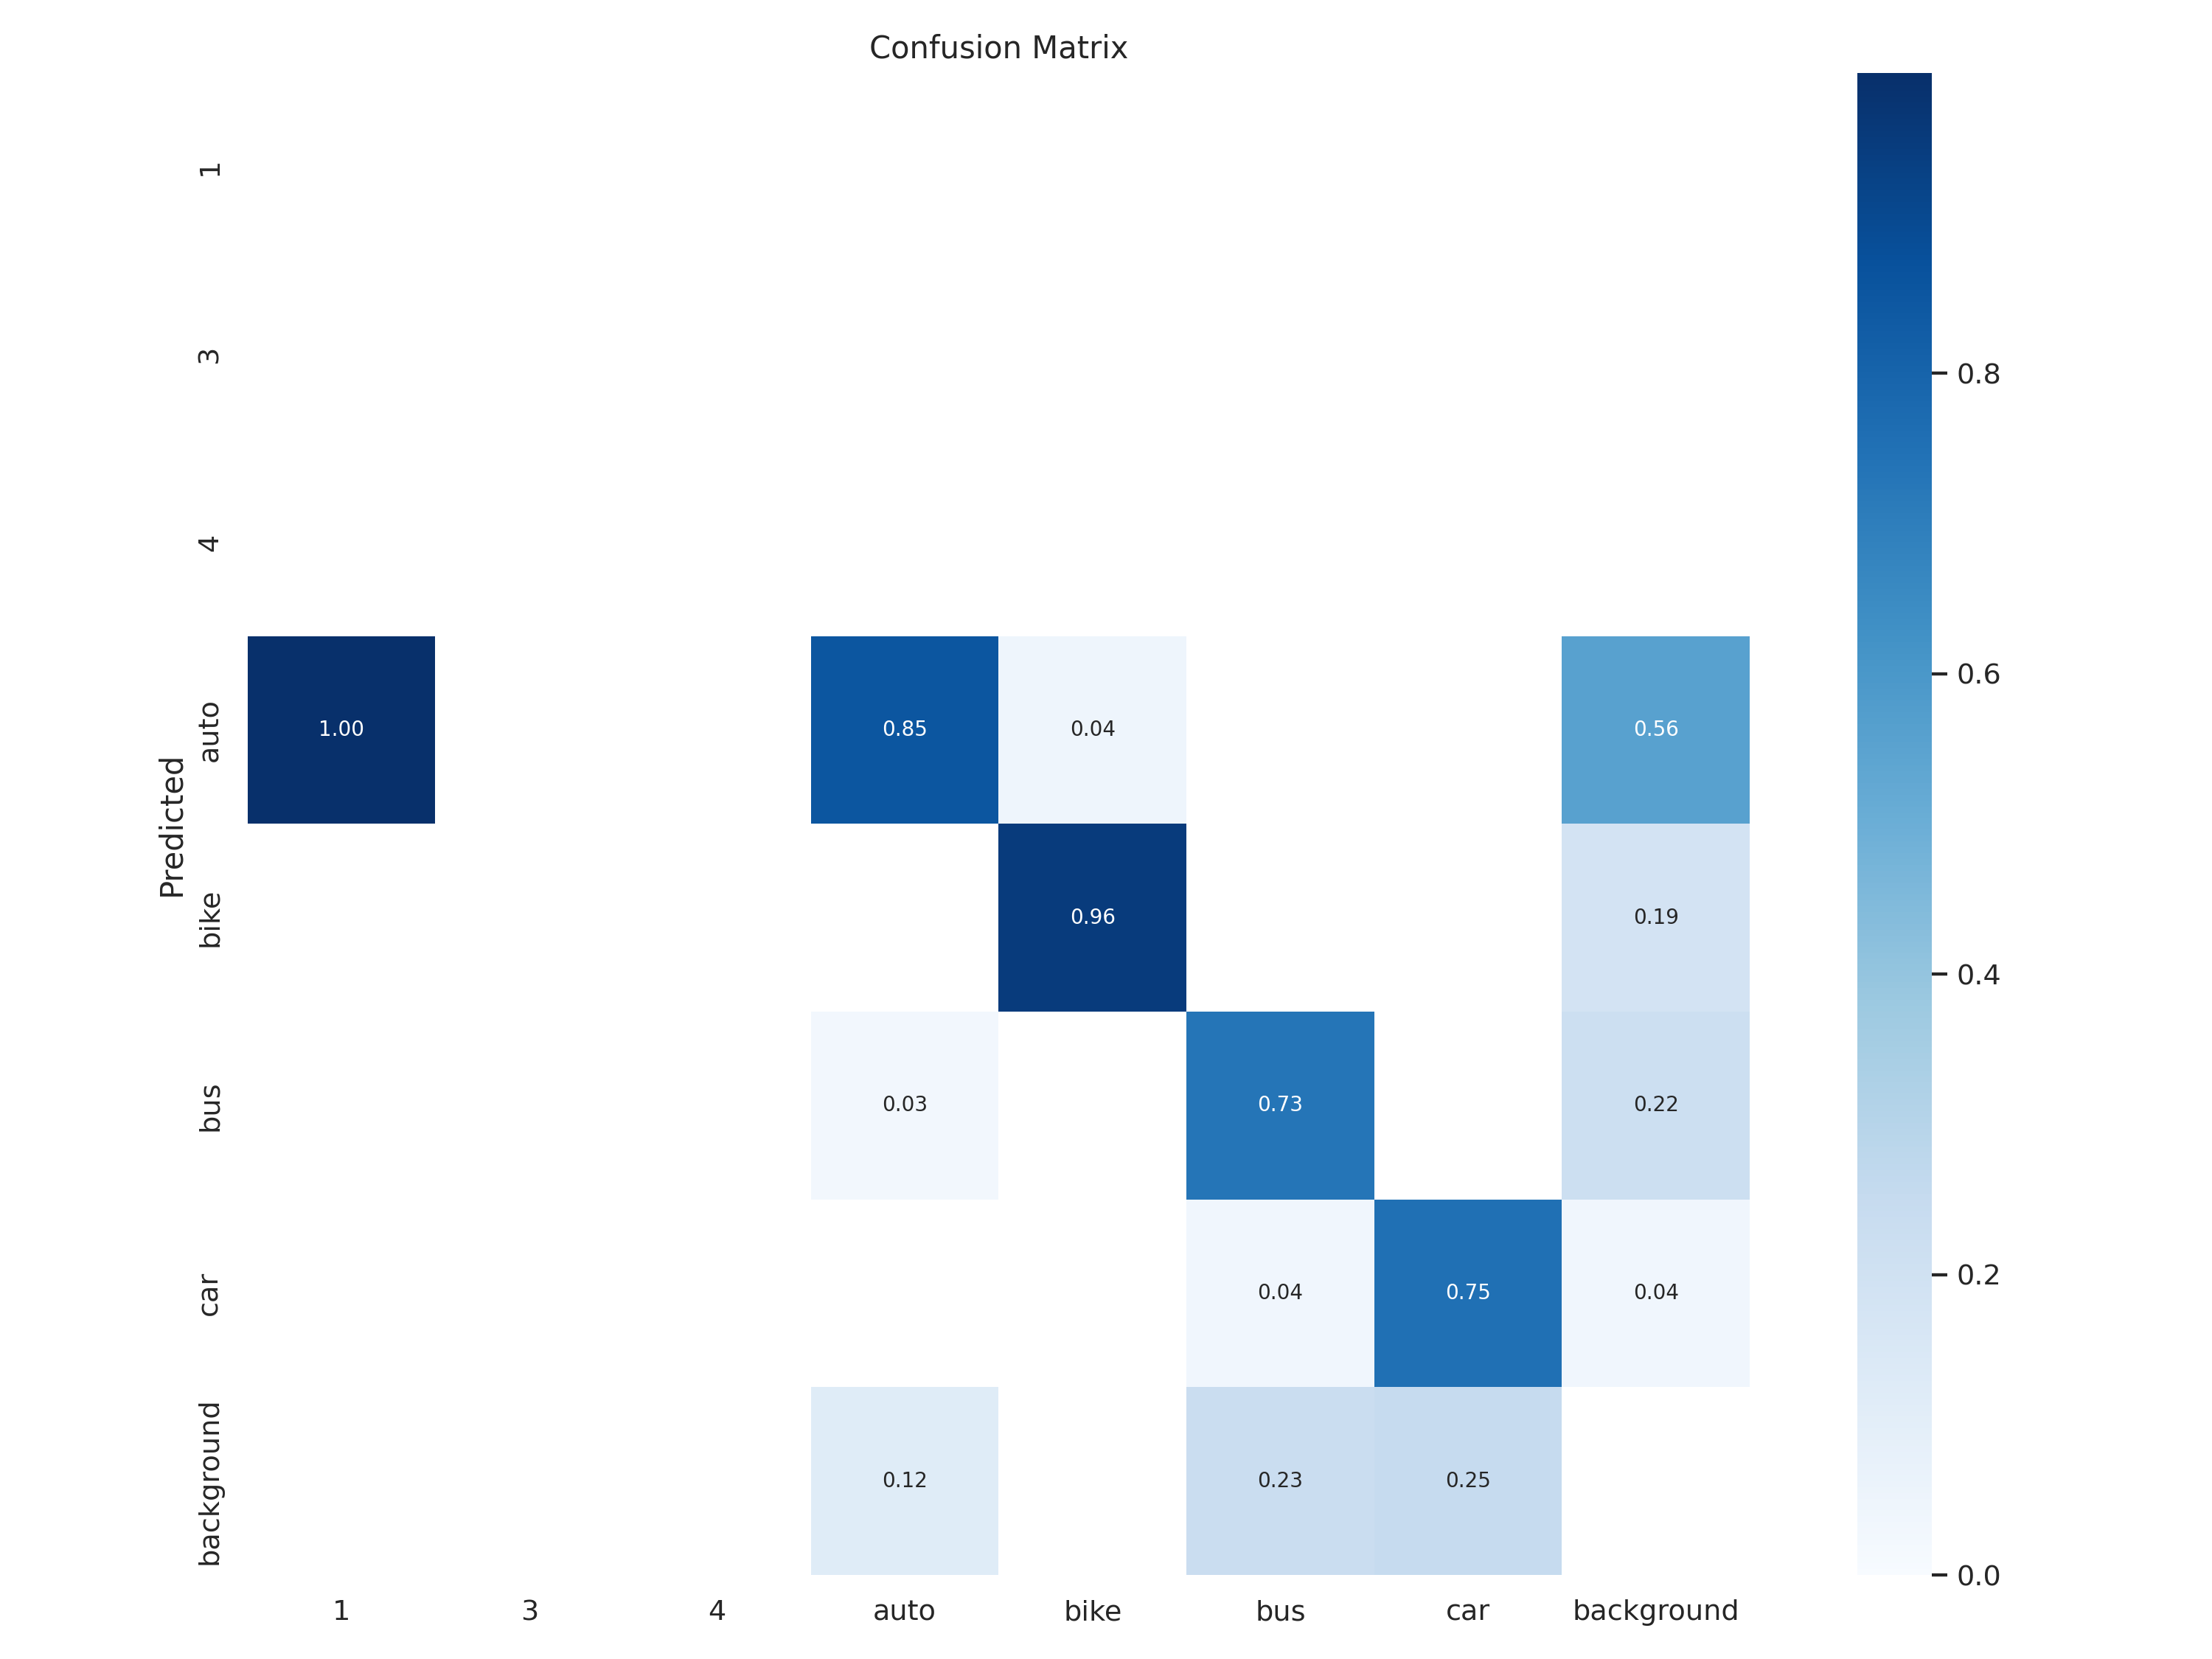

In [ ]:
Image(filename ='/content/drive/MyDrive/yolov8/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train2/confusion_matrix.png')

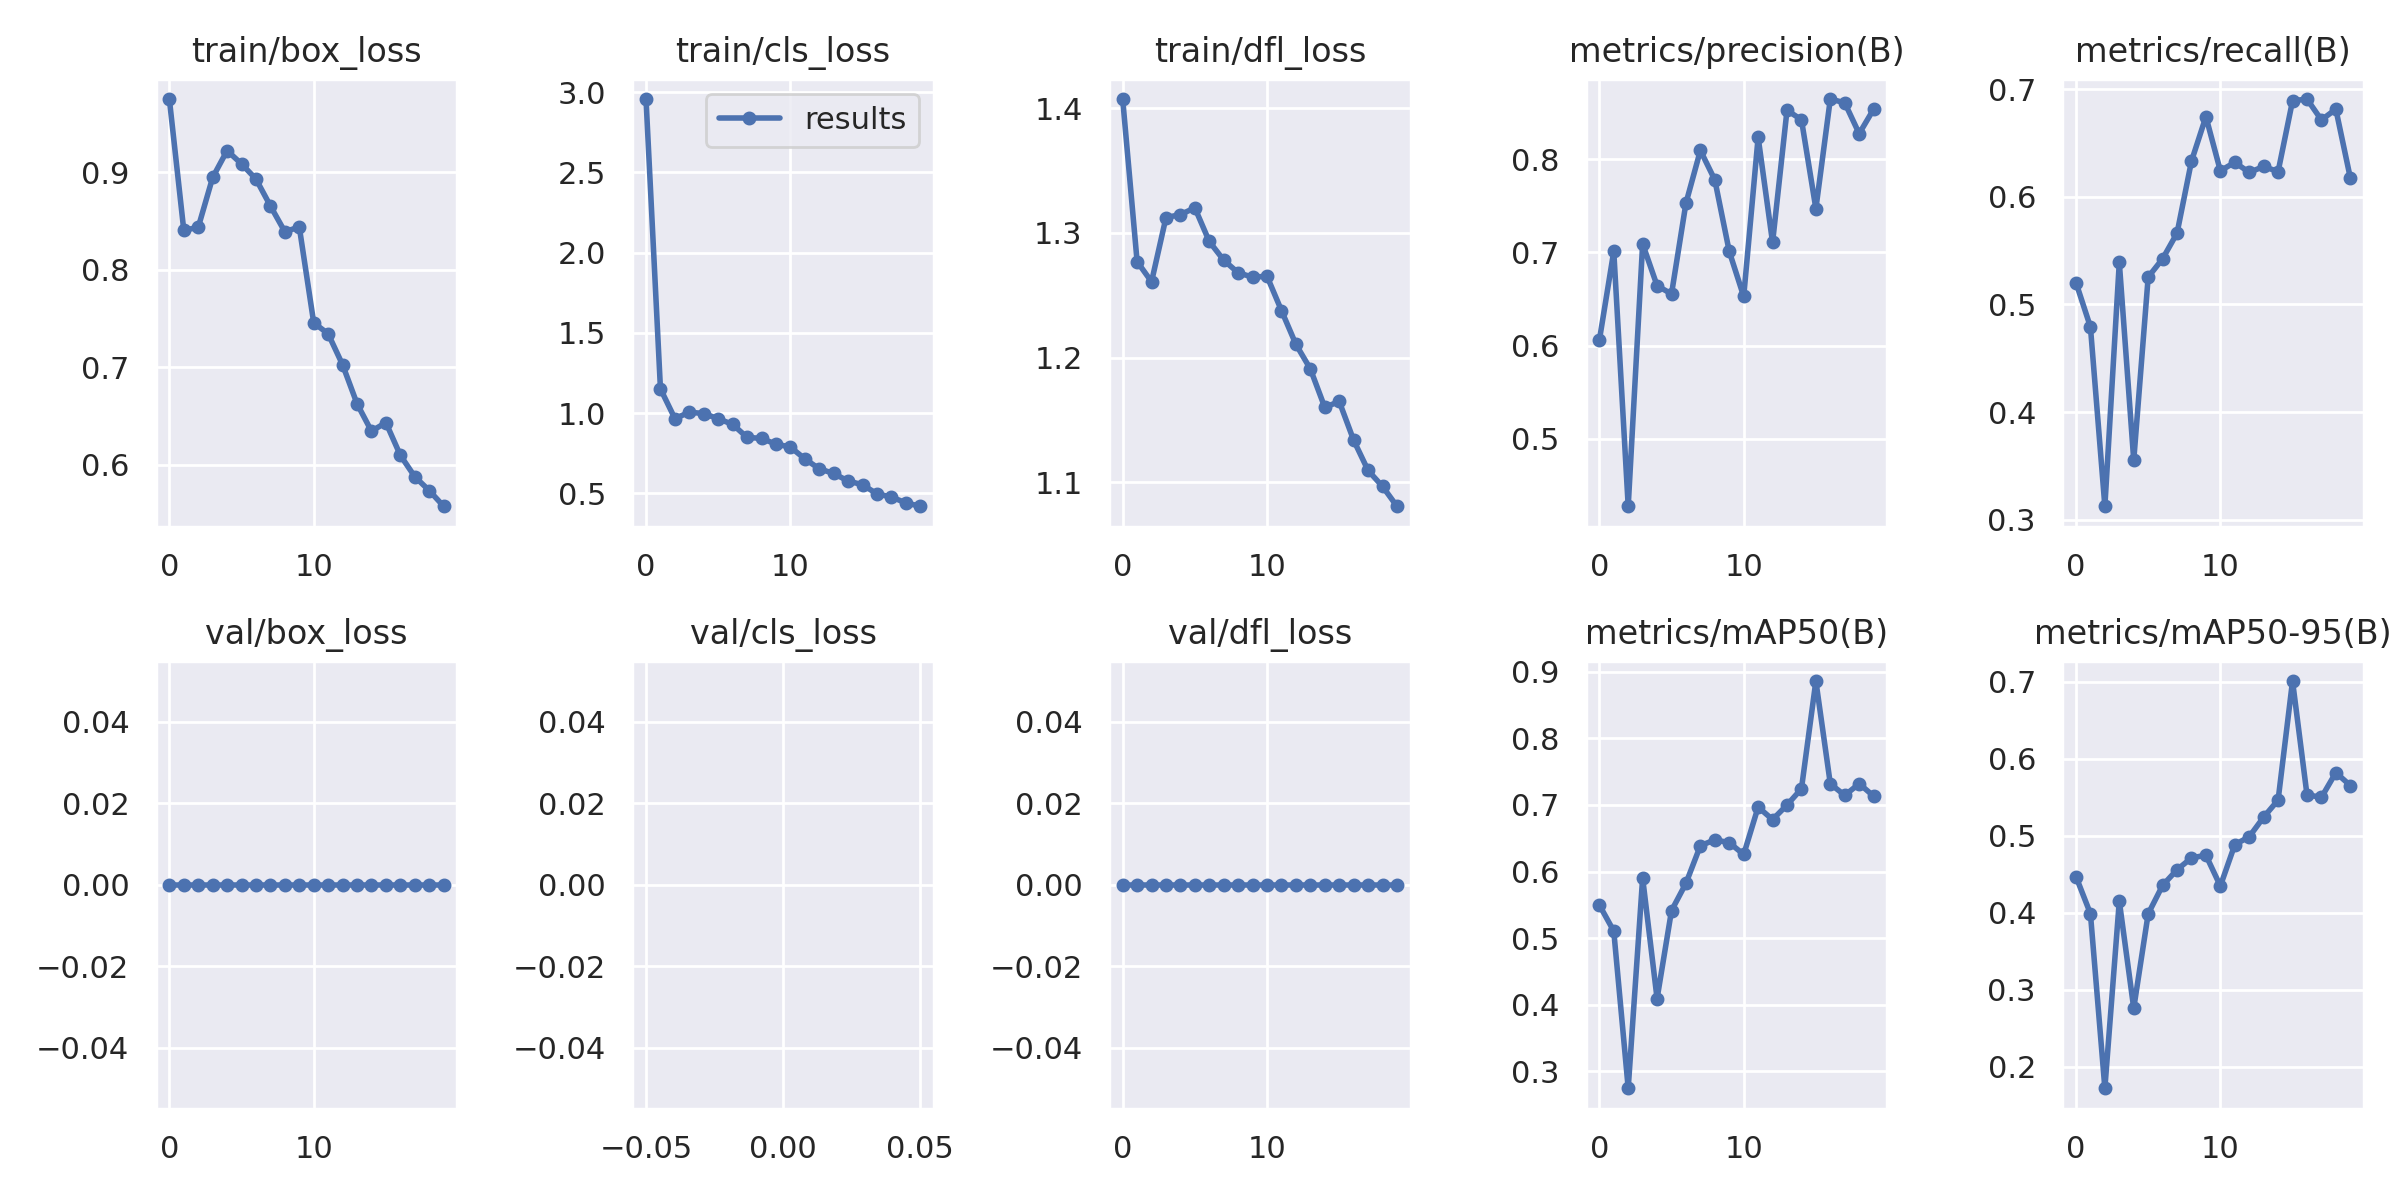

In [ ]:

Image(filename='/content/drive/MyDrive/yolov8/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train2/results.png')

In [ ]:
!pwd

/content/drive/MyDrive/yolov8/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect


In [ ]:
!python predict.py model=/content/drive/MyDrive/yolov8/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train2/weights/best.pt source="/content/una_traffic.mp4"

[2023-11-02 04:59:30,983][root.tracker][INFO] - Loading weights from deep_sort_pytorch/deep_sort/deep/checkpoint/ckpt.t7... Done!
2023-11-02 04:59:32.935762: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-02 04:59:32.935824: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-02 04:59:32.935862: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-02 04:59:32.943265: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AV

In [ ]:
!rm "/content/drive/MyDrive/yolov8/result_compressed1.mp4"

rm: cannot remove '/content/drive/MyDrive/yolov8/result_compressed1.mp4': No such file or directory


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = ' /content/drive/MyDrive/yolov8/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train3/una_traffic.mp4'

# Compressed video path
compressed_path = "/content/drive/MyDrive/yolov8/result_compressed1.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
!pwd

/content/drive/MyDrive/yolov8/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect


**part 2: own datset **


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mar374tKag3yxBuL04X0")
project = rf.workspace("vehicle-muwox").project("vehicle-detection-71d0s")
dataset = project.version(1).download("yolov8")

  Using cached roboflow-1.1.7-py3-none-any.whl (58 kB)
  Using cached certifi-2022.12.7-py3-none-any.whl (155 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached opencv_python_headless-4.8.0.74-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.1 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached python_dotenv-1.0.0-py3-none-any.whl (19 kB)
  Using cached supervision-0.16.0-py3-none-any.whl (72 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl (54 kB)
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstal

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.134`, to intall it `pip install ultralytics==8.0.134`.



Extracting Dataset Version Zip to vehicle-detection-1 in yolov8:: 100%|██████████| 109/109 [00:00<00:00, 193.84it/s]


In [ ]:
dataset.location

'/content/drive/MyDrive/yolov8/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/vehicle-detection-1'

In [ ]:
!ls

deep_sort_pytorch      __init__.py  predict.py	 train.log  val.py	       vehicle-detection-1
deep_sort_pytorch.zip  predict.log  __pycache__  train.py   Vehicle-Dataset-2  yolov8s.pt


In [ ]:
!python train.py model=yolov8s.pt data={dataset.location}/data.yaml epochs=30 imgsz=640

yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/yolov8/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/vehicle-detection-1/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=

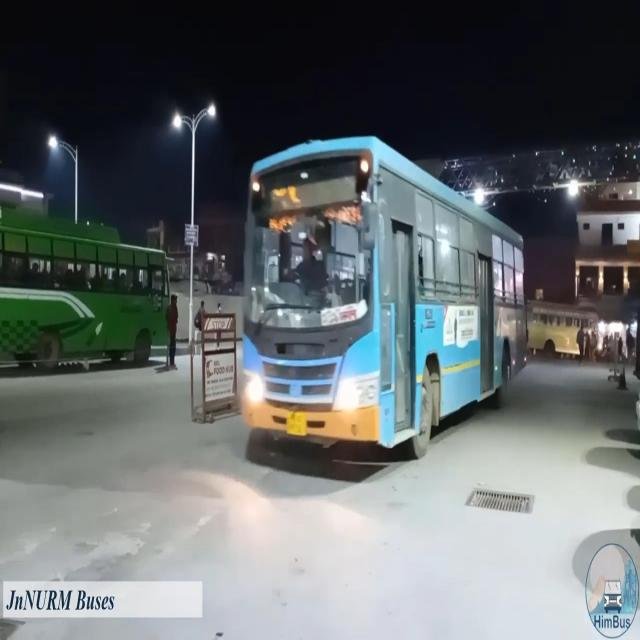

In [ ]:
Image(filename='/content/drive/MyDrive/yolov8/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/vehicle-detection-1/train/images/HRTC-s-new-bus-stand-at-Una_mp4-1007_jpg.rf.ea1bf73f30d1c3c0600dd5b6c02549c1.jpg')